In [6]:
import sys
import os
sys.path.append(os.path.abspath("../.."))

from ml.models.VisionCNN import VisionCNN
from lightning.pytorch.tuner.tuning import Tuner
from lightning.pytorch import Trainer
from ml.data.PetalDataModule import PetalDataModule

In [7]:
model = VisionCNN(
    pretrained_model_name='eva_large_patch14_336',
    n_output=6,
    freeze=False,
    lr=0.001
)

In [8]:

data_module = PetalDataModule(pretrained_model_name="eva_large_patch14_336")

In [9]:
trainer = Trainer(max_epochs=10)
tuner = Tuner(trainer)

/home/dlonghi1_jm/Projects/plant_emotion_classification/venv/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/dlonghi1_jm/Projects/plant_emotion_classificat ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [10]:

lr_finder = tuner.lr_find(model, datamodule=data_module)

/home/dlonghi1_jm/Projects/plant_emotion_classification/venv/lib/python3.10/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)
/home/dlonghi1_jm/Projects/plant_emotion_classification/venv/lib/python3.10/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


Failed to create or save snippet for recording: /home/dlonghi1_jm/.data/petal/post-labeled/unlabeled-audio/10_dreimasterblume_3mast_142hz_1738663599077.wav with following error: division by zero. Start of snippet: 12000. End of snippet: 20000
Failed to create or save snippet for recording: /home/dlonghi1_jm/.data/petal/post-labeled/unlabeled-audio/11_tim_basilikum_142hz_1738681653620.wav with following error: division by zero. Start of snippet: 12000. End of snippet: 20000
Loading recording: /home/dlonghi1_jm/.data/petal/post-labeled/unlabeled-audio/12_philipp_basilikum_142hz_1738682521686.wav failed with following error: [Errno 2] No such file or directory: 'ffprobe'
Failed to create or save snippet for recording: /home/dlonghi1_jm/.data/petal/post-labeled/unlabeled-audio/12_philipp_basilikum_142hz_1738682521686.wav with following error: division by zero. Start of snippet: 12000. End of snippet: 20000
Failed to create or save snippet for recording: /home/dlonghi1_jm/.data/petal/post-l

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Failed to create or save snippet for recording: /home/dlonghi1_jm/.data/petal/post-labeled/unlabeled-audio/59_jascha_basilikum_142hz_1739445172129.wav with following error: division by zero. Start of snippet: 12000. End of snippet: 20000
Failed to create or save snippet for recording: /home/dlonghi1_jm/.data/petal/post-labeled/unlabeled-audio/60_jasmin_basilikum_142hz_1739447961565.wav with following error: division by zero. Start of snippet: 12000. End of snippet: 20000
Failed to create or save snippet for recording: /home/dlonghi1_jm/.data/petal/post-labeled/unlabeled-audio/61_philipp e._basilikum_142hz_1739454078428.wav with following error: division by zero. Start of snippet: 12000. End of snippet: 20000
Failed to create or save snippet for recording: /home/dlonghi1_jm/.data/petal/post-labeled/unlabeled-audio/62_veronika_basilikum_142hz_1739455164075.wav with following error: division by zero. Start of snippet: 12000. End of snippet: 20000
Failed to create or save snippet for recor

OutOfMemoryError: CUDA out of memory. Tried to allocate 16.00 MiB. GPU 0 has a total capacity of 23.47 GiB of which 14.94 MiB is free. Process 307550 has 2.59 GiB memory in use. Including non-PyTorch memory, this process has 20.86 GiB memory in use. Of the allocated memory 20.32 GiB is allocated by PyTorch, and 354.76 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

0.0005248074602497723

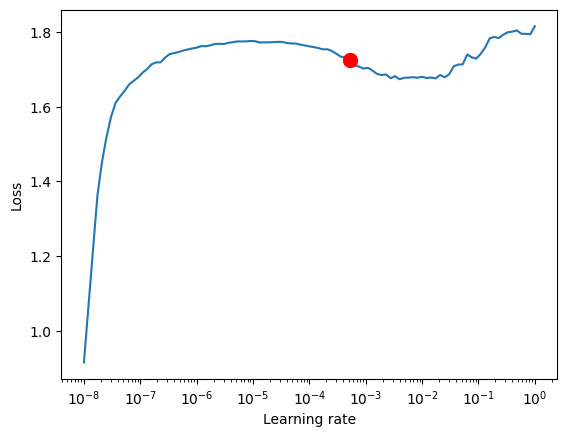

In [ ]:
assert lr_finder is not None
fig = lr_finder.plot(suggest=True)
lr_finder.suggestion()